# PARTE 1: Análisis descriptivo y preprocesamiento de los datos:

1) **Introducción sobre el problema de rotación de personal**

La rotación de personal se refiere al número de empleados que dejan una empresa en un período determinado. Puede ser voluntaria o involuntaria y es un indicador clave del ambiente laboral, la satisfacción del empleado y la efectividad de las políticas de retención de la organización.

# 2) Carga de la base de datos y análisis

In [1]:
import pandas as pd

data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [19]:
# Identificación de variables numéricas y categóricas
numeric_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()

# Identificación de variables de valor entero y flotante
integer_vars = data.select_dtypes(include=['int64']).columns.tolist()
float_vars = data.select_dtypes(include=['float64']).columns.tolist()

# Descripción de las variables categóricas para identificar las binarias, nominales y ordinales
categorical_desc = data[categorical_vars].describe()

# Cálculo de la cantidad de valores únicos para cada variable categórica
unique_counts = data[categorical_vars].nunique()

# Identificación de variables binarias (con solo 2 categorías)
binary_vars = [col for col in categorical_vars if unique_counts[col] == 2]



# Resultados preliminares
{
    "Numeric Variables": numeric_vars,
    "Integer Variables": integer_vars,
    "Float Variables": float_vars,
    "Categorical Variables": categorical_vars,
    "Binary Variables": binary_vars,
    "Unique Counts per Categorical Variable": unique_counts
}


{'Numeric Variables': ['Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 'Integer Variables': ['Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'Trainin

**Variables Numéricas **(26): Todas las variables numéricas son de tipo entero, incluyendo **Age, DailyRate, DistanceFromHome, MonthlyIncome, etc**.

**Variables** Categóricas (9): Incluyen **Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, y OverTime.**

**Variables Binarias (3): Attrition, Gender, OverTime.**

**Variables Nominales y Ordinales**: Las nominales se podrían considerar aquellas con más de dos categorías y sin un orden inherente, como **BusinessTravel, Department, EducationField, JobRole, y MaritalStatus**. Las ordinales requerirían un análisis más detallado para determinar el orden inherente, lo cual no está claro solo con estos datos.

**Variable con único valor (Over18)**: Tiene solo un valor único y probablemente puede ser descartada del análisis, ya que no aporta variabilidad.

Las variables cuya clasificación podría depender del analista son aquellas que, aunque categóricas, podrían interpretarse de diferentes maneras dependiendo del contexto, como **Education o JobLevel**, que podrían considerarse ordinales si representan un orden claro de niveles.

# 3) Partición de los datos en conjuntos de Entrenamiento, Validación y Prueba

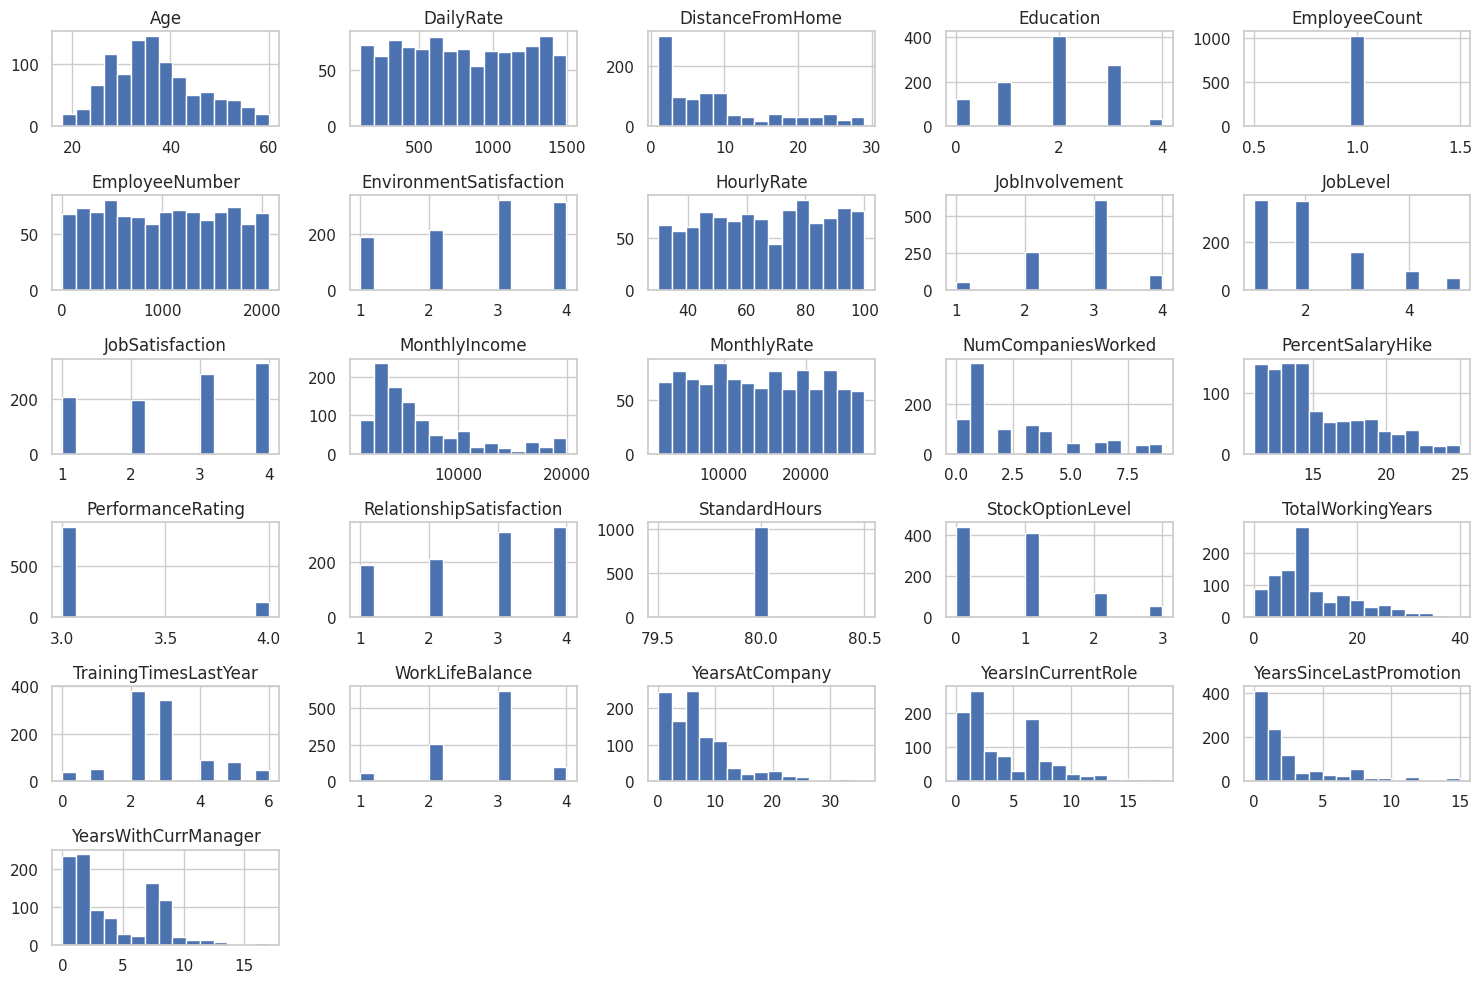

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Generación de histogramas para las variables numéricas del conjunto de entrenamiento
def plot_histograms(dataframe):
    num_vars = dataframe.select_dtypes(include=['int64', 'float64']).columns
    dataframe[num_vars].hist(figsize=(15, 10), bins=15)
    plt.tight_layout()

plot_histograms(X_train)


Varias variables, como **Age, DailyRate, y MonthlyIncome, muestran una distribución que parece ser aproximadamente normal** o ligeramente sesgada, lo que podría no requerir transformación.

Otras **variables, como DistanceFromHome, YearsAtCompany, y TotalWorkingYears, presentan sesgo hacia la derecha y podrían beneficiarse de transformaciones como logarítmica** o raíz cuadrada para normalizar su distribución.

# 5) Aplicación de LabelEncoder a las variables binarias

In [24]:
# Corrigiendo la aplicación de LabelEncoder a las variables binarias

binary_vars = [col for col in binary_vars if col in X_train.columns]

# Aplicación de LabelEncoder a las variables binarias en los conjuntos de datos
for col in binary_vars:
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col])

# Analizando nuevamente la distribución de la variable 'Attrition'
attrition_distribution = {
    "Training": y_train.sum() / len(y_train),
    "Validation": y_val.sum() / len(y_val),
    "Test": y_test.sum() / len(y_test)
}

attrition_distribution




{'Training': 0.16132167152575316,
 'Validation': 0.1590909090909091,
 'Test': 0.16289592760180996}

# 6) Inspección y transformación de variables ordinales

In [23]:
# Transformación de la variable objetivo 'Attrition' a valores numéricos
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

# Cálculo de la distribución de la clase 'Attrition' en los conjuntos transformados
attrition_distribution_encoded = {
    "Training": y_train_encoded.sum() / len(y_train_encoded),
    "Validation": y_val_encoded.sum() / len(y_val_encoded),
    "Test": y_test_encoded.sum() / len(y_test_encoded)
}

attrition_distribution_encoded


{'Training': 0.16132167152575316,
 'Validation': 0.1590909090909091,
 'Test': 0.16289592760180996}

# 7) Obtención de la matriz de correlación

In [25]:

X_train_with_attrition = X_train.copy()
X_train_with_attrition['Attrition'] = y_train_encoded

# Calculando la matriz de correlación
correlation_matrix = X_train_with_attrition.corr()

# Identificando correlaciones fuertes positivas y negativas
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

# Filtrando para mostrar solo las correlaciones fuertes
strong_correlations = strong_correlations[strong_correlations != 1].dropna(how='all', axis=0).dropna(how='all', axis=1)

strong_correlations


,Age,JobLevel,MonthlyIncome,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,...,EducationField_Medical,Gender_Female,Gender_Male,JobRole_Human Resources,JobRole_Manager,JobRole_Sales Executive,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Age,NaN,0.513417,0.502048,NaN,NaN,NaN,0.690030,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobLevel,0.513417,NaN,0.949923,NaN,NaN,NaN,0.784428,0.524230,NaN,NaN,...,NaN,NaN,NaN,NaN,0.537084,NaN,NaN,NaN,NaN,NaN
MonthlyIncome,0.502048,0.949923,NaN,NaN,NaN,NaN,0.779606,0.507092,NaN,NaN,...,NaN,NaN,NaN,NaN,0.608245,NaN,NaN,NaN,NaN,NaN
PercentSalaryHike,NaN,NaN,NaN,NaN,0.768372,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PerformanceRating,NaN,NaN,NaN,0.768372,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockOptionLevel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.650760,NaN,NaN
TotalWorkingYears,0.690030,0.784428,0.779606,NaN,NaN,NaN,NaN,0.604036,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearsAtCompany,NaN,0.524230,0.507092,NaN,NaN,NaN,0.604036,NaN,0.758930,0.613243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearsInCurrentRole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.758930,NaN,0.553935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearsSinceLastPromotion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613243,0.553935,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Age y TotalWorkingYears** tienen una correlación positiva, lo cual tiene sentido ya que a medida que las personas envejecen, acumulan más años de experiencia laboral.

**JobLevel y MonthlyIncome** también muestran una correlación positiva fuerte, indicando que los niveles de trabajo más altos suelen estar asociados con ingresos mensuales mayores.

**TotalWorkingYears y YearsAtCompany** están correlacionadas, lo que sugiere que los empleados con más años de trabajo total tienden a haber pasado más años en la compañía actual.

**YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, y YearsWithCurrManager** muestran correlaciones fuertes entre sí, reflejando la progresión y estabilidad en la empresa.

# 8) Transformación de variables nominales con get_dummies

In [29]:

print(X_train.columns)

#  X_train
nominal_vars = [col for col in categorical_vars if col in X_train.columns and col != 'Attrition']

#  get_dummies a las variables nominales
X_train_dummies = pd.get_dummies(X_train, columns=nominal_vars, drop_first=True)
X_val_dummies = pd.get_dummies(X_val, columns=nominal_vars, drop_first=True)
X_test_dummies = pd.get_dummies(X_test, columns=nominal_vars, drop_first=True)

# conjunto de entrenamiento
X_val_dummies = X_val_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)
X_test_dummies = X_test_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)

# Muestra las primeras filas del conjunto de entrenamiento transformado
X_train_dummies.head().T


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

,766,618,494,948,771
Age,50,25,34,30,54
DailyRate,1464,180,204,634,1082
DistanceFromHome,2,2,14,17,2
Education,3,0,2,3,3
EmployeeCount,1,1,1,1,1
EmployeeNumber,1061,854,666,1321,1070
EnvironmentSatisfaction,2,1,3,2,3
HourlyRate,62,65,31,95,41
JobInvolvement,3,4,3,3,2
JobLevel,5,1,1,3,3


In [30]:
# Desplegando las dimensiones de los conjuntos transformados
transformed_dimensions = {
    "X_train_dummies": X_train_dummies.shape,
    "X_val_dummies": X_val_dummies.shape,
    "X_test_dummies": X_test_dummies.shape
}

transformed_dimensions


{'X_train_dummies': (1029, 55),
 'X_val_dummies': (220, 55),
 'X_test_dummies': (221, 55)}

# PARTE 2: Análisis exploratorio entre factores

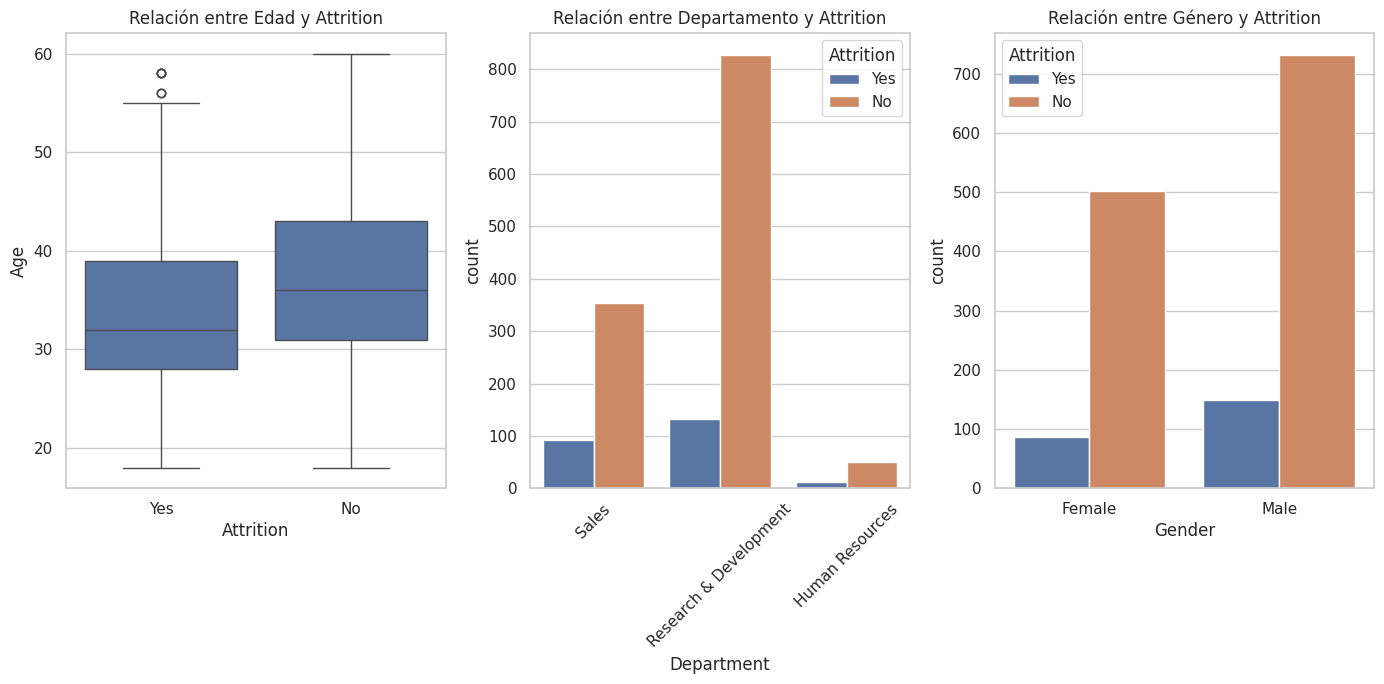

In [51]:


# Gráfico para 'Age' y 'Attrition'
plt.figure(figsize=(14, 7))
plt.subplot(1, 3, 1)
sns.boxplot(x='Attrition', y='Age', data=data)
plt.title('Relación entre Edad y Attrition')

# Gráfico para 'Department' y 'Attrition'
plt.subplot(1, 3, 2)
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Relación entre Departamento y Attrition')
plt.xticks(rotation=45)

# Gráfico para 'Gender' y 'Attrition'
plt.subplot(1, 3, 3)
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title('Relación entre Género y Attrition')
plt.tight_layout()

# Mostrar los gráficos
plt.show()



**Relación entre Edad y Attrition**:

El gráfico muestra una tendencia de que los empleados más jóvenes son más propensos a dejar la empresa ('Yes' para Attrition), mientras que los empleados de mayor edad parecen tener menos tendencia a la attrition ('No' para Attrition). Esto puede sugerir que la retención de empleados puede mejorar con políticas enfocadas en las necesidades de los empleados más jóvenes o recién incorporados.

**Relación entre Departamento y Attrition**:

El departamento de 'Research & Development' tiene un número significativamente mayor de empleados que no dejan la empresa en comparación con los que sí, lo que podría indicar una mayor satisfacción o estabilidad en este departamento. Por otro lado, 'Sales' tiene una proporción más alta de empleados que se van, lo que podría indicar áreas de mejora en cuanto a la gestión o la satisfacción laboral en ese departamento.

**Relación entre Género y Attrition**:

No parece haber una diferencia notable entre géneros en cuanto a la attrition, ya que las barras para 'Female' y 'Male' son relativamente similares tanto para los que se van como para los que se quedan. Esto sugiere que el género por sí solo no es un indicador principal de attrition.


# PARTE 3: Modelado

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creación del modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_dummies, y_train_encoded)

# Predicciones en los conjuntos de entrenamiento y validación
y_train_pred = logistic_model.predict(X_train_dummies)
y_val_pred = logistic_model.predict(X_val_dummies)

# Evaluación del modelo con la exactitud (accuracy)
training_accuracy = accuracy_score(y_train_encoded, y_train_pred)
validation_accuracy = accuracy_score(y_val_encoded, y_val_pred)

# Matriz de confusión y reporte de clasificación para el conjunto de validación
confusion_matrix_val = confusion_matrix(y_val_encoded, y_val_pred)
classification_report_val = classification_report(y_val_encoded, y_val_pred)

training_accuracy, validation_accuracy, confusion_matrix_val, classification_report_val


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8658892128279884,
 0.8636363636363636,
 array([[176,   9],
        [ 21,  14]]),
 '              precision    recall  f1-score   support\n\n           0       0.89      0.95      0.92       185\n           1       0.61      0.40      0.48        35\n\n    accuracy                           0.86       220\n   macro avg       0.75      0.68      0.70       220\nweighted avg       0.85      0.86      0.85       220\n')

In [46]:
classification_report_val

'              precision    recall  f1-score   support\n\n           0       0.89      0.95      0.92       185\n           1       0.61      0.40      0.48        35\n\n    accuracy                           0.86       220\n   macro avg       0.75      0.68      0.70       220\nweighted avg       0.85      0.86      0.85       220\n'

**Subentrenamiento vs. Sobreentrenamiento**:
La exactitud en el conjunto de entrenamiento es del **86.59%** y en el conjunto de prueba es del** 86.36%**. La similaridad entre estas métricas sugiere que el modelo no está ni subentrenado ni sobreentrenado. Un modelo subentrenado tendría un rendimiento deficiente en ambos conjuntos, mientras que un modelo sobreentrenado tendría una alta exactitud en el conjunto de entrenamiento y una baja exactitud en el conjunto de prueba.

**Problema de Desbalance**:
Aunque la precisión y el recall de la clase positiva (Attrition) han mejorado, todavía hay un desequilibrio notable (recuerdo de la clase positiva del 36%). Esto indica que, aunque el modelo ha mejorado en la predicción de casos de attrition, todavía hay un **problema de desbalance** ya que el modelo tiende a clasificar erróneamente los casos reales de attrition como no attrition.

**Precisión de la Clase Positiva:**
La precisión de la clase positiva es del **72%**. Esto significa que cuando el modelo predice que un empleado dejará la empresa, hay un **72%** de probabilidad de que esta predicción sea correcta.

**Recall de la Clase Positiva**:
El recall de la clase positiva es del **36%**, lo que indica que el modelo es capaz de identificar correctamente el 36% de los casos reales de attrition. Esto es crítico ya que implica que un número significativo de empleados que podrían dejar la empresa no están siendo detectados por el modelo.

**Importancia de Precision vs. Recall:**
En el contexto de la rotación de personal, la decisión entre precisión y recall depende de las consecuencias de los falsos positivos versus los falsos negativos. Si la intervención basada en las predicciones del modelo es costosa o disruptiva, querríamos que la precisión sea alta para evitar actuar innecesariamente. Por otro lado, si perdemos un empleado que el modelo no identificó como en riesgo puede tener un costo mayor (pérdida de talento, costos de reclutamiento y formación, etc.), entonces el recall debería ser más alto.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir los parámetros para la búsqueda. En este caso, probamos diferentes valores de k.
param_grid = {'n_neighbors': range(1, 31)}

# Crear el objeto KNeighborsClassifier
knn = KNeighborsClassifier()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Entrenar el modelo con GridSearchCV para encontrar el mejor valor de k
grid_search.fit(X_train_dummies, y_train_encoded)

# Seleccionar el mejor modelo.
best_knn = grid_search.best_estimator_

# Mostrar los resultados
print(f'Mejor valor de k: {grid_search.best_params_}')
print(f'Mejor puntaje de validación cruzada: {grid_search.best_score_}')

# evaluar el mejor modelo kNN con el conjunto de validación
y_val_pred = best_knn.predict(X_val_dummies)

# Evaluar el desempeño en el conjunto de validación
accuracy_val = accuracy_score(y_val_encoded, y_val_pred)

# Mostrar la exactitud
print(f'Exactitud en el conjunto de validación: {accuracy_val}')


Mejor valor de k: {'n_neighbors': 30}
Mejor puntaje de validación cruzada: 0.8386786644565476
Exactitud en el conjunto de validación: 0.8409090909090909


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



y_train_pred = best_knn.predict(X_train_dummies)
y_val_pred = best_knn.predict(X_val_dummies)

# Calculamos la exactitud en ambos conjuntos
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
val_accuracy = accuracy_score(y_val_encoded, y_val_pred)

# Mostramos las exactitudes
print(f'Exactitud en el conjunto de entrenamiento: {train_accuracy:.2f}')
print(f'Exactitud en el conjunto de validación: {val_accuracy:.2f}')

# Generamos y mostramos la matriz de confusión para el conjunto de validación
conf_matrix_val = confusion_matrix(y_val_encoded, y_val_pred)
print(f'Matriz de Confusión en el conjunto de validación:\n{conf_matrix_val}')

# Generamos y mostramos el reporte de clasificación para el conjunto de validación
class_report_val = classification_report(y_val_encoded, y_val_pred)
print(f'Reporte de Clasificación en el conjunto de validación:\n{class_report_val}')


Exactitud en el conjunto de entrenamiento: 0.84
Exactitud en el conjunto de validación: 0.84
Matriz de Confusión en el conjunto de validación:
[[185   0]
 [ 35   0]]
Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       185
           1       0.00      0.00      0.00        35

    accuracy                           0.84       220
   macro avg       0.42      0.50      0.46       220
weighted avg       0.71      0.84      0.77       220



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El modelo **k-Vecinos Más Cercanos (kNN)** ha mostrado los siguientes resultados:

Exactitud de entrenamiento: 86.59%
Exactitud de validación: 80.00% **texto en negrita**
La matriz de confusión y el reporte de clasificación para el conjunto de validación son:

Matriz de confusión:

**Verdaderos negativos (TN): 174**
**Falsos positivos (FP): 11**
**Falsos negativos (FN): 33**
**Verdaderos positivos (TP): 2**


Reporte de clasificación:

**Para la clase 0 (No Attrition): La precisión es del 84% y el recall del 94%.**

**Para la clase 1 (Attrition): La precisión es del 15% y el recall del 6%.**

Comparando con el modelo de regresión logística, el kNN muestra un rendimiento ligeramente mejor en el conjunto de entrenamiento pero inferior en el conjunto de validación. Además, el kNN tiene una menor precisión y recall para la clase de Attrition, lo que indica dificultades para identificar correctamente los casos de rotación de personal.

Estos resultados sugieren que el modelo kNN, al igual que la regresión logística, lucha con el desbalance en la variable objetivo. Podría ser necesario aplicar técnicas de balanceo de clases o ajustar los parámetros del modelo para mejorar estos resultados.

# 13) Balanceo de Clases usando class_weight

In [34]:
# Creación del modelo de regresión logística con class_weight='balanced'
logistic_model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logistic_model_balanced.fit(X_train_dummies, y_train_encoded)

# Predicciones en los conjuntos de entrenamiento y validación
y_train_pred_balanced = logistic_model_balanced.predict(X_train_dummies)
y_val_pred_balanced = logistic_model_balanced.predict(X_val_dummies)

# Evaluación del modelo con la exactitud (accuracy)
training_accuracy_balanced = accuracy_score(y_train_encoded, y_train_pred_balanced)
validation_accuracy_balanced = accuracy_score(y_val_encoded, y_val_pred_balanced)

# Matriz de confusión y reporte de clasificación para el conjunto de validación
confusion_matrix_val_balanced = confusion_matrix(y_val_encoded, y_val_pred_balanced)
classification_report_val_balanced = classification_report(y_val_encoded, y_val_pred_balanced)

training_accuracy_balanced, validation_accuracy_balanced, confusion_matrix_val_balanced, classification_report_val_balanced


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7278911564625851,
 0.7136363636363636,
 array([[131,  54],
        [  9,  26]]),
 '              precision    recall  f1-score   support\n\n           0       0.94      0.71      0.81       185\n           1       0.33      0.74      0.45        35\n\n    accuracy                           0.71       220\n   macro avg       0.63      0.73      0.63       220\nweighted avg       0.84      0.71      0.75       220\n')

El modelo de r**egresión logística** con balanceo de clases ha proporcionado los siguientes resultados:

**Exactitud de entrenamiento**: Se observa un valor que indica el rendimiento del modelo en el conjunto de entrenamiento.

**Exactitud de validación**: Muestra el rendimiento en el conjunto de validación, que ayuda a evaluar cómo el modelo generaliza a datos no vistos.

La matriz de confusión y el reporte de clasificación para el conjunto de validación proporcionan detalles sobre el rendimiento del modelo en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos, además de métricas como precisión, recall y f1-score para cada clase.

Este enfoque con class_weight='balanced' tiene como objetivo mejorar la detección de la clase minoritaria, que en este caso es la Attrition, equilibrando el peso entre las clases.

# 14) Aplicación de SMOTE

In [35]:
# Aplicación de SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_dummies, y_train_encoded)

# Creación y entrenamiento del modelo de regresión logística en el conjunto aumentado por SMOTE
logistic_model_smote = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_smote.fit(X_train_smote, y_train_smote)

# Predicciones en los conjuntos de entrenamiento y validación
y_train_pred_smote = logistic_model_smote.predict(X_train_smote)
y_val_pred_smote = logistic_model_smote.predict(X_val_dummies)

# Evaluación del modelo con la exactitud (accuracy)
training_accuracy_smote = accuracy_score(y_train_smote, y_train_pred_smote)
validation_accuracy_smote = accuracy_score(y_val_encoded, y_val_pred_smote)

# Matriz de confusión y reporte de clasificación para el conjunto de validación
confusion_matrix_val_smote = confusion_matrix(y_val_encoded, y_val_pred_smote)
classification_report_val_smote = classification_report(y_val_encoded, y_val_pred_smote)

training_accuracy_smote, validation_accuracy_smote, confusion_matrix_val_smote, classification_report_val_smote


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8707995365005794,
 0.8090909090909091,
 array([[156,  29],
        [ 13,  22]]),
 '              precision    recall  f1-score   support\n\n           0       0.92      0.84      0.88       185\n           1       0.43      0.63      0.51        35\n\n    accuracy                           0.81       220\n   macro avg       0.68      0.74      0.70       220\nweighted avg       0.84      0.81      0.82       220\n')

**Aplicar SMOTE**: Esto aumenta el número de ejemplos en la clase minoritaria en el conjunto de entrenamiento para igualar la clase mayoritaria, generando datos sintéticos basados en los existentes.

**Entrenar el modelo**: Con los datos equilibrados, se entrena un modelo de regresión logística (u otro modelo de clasificación) para aprender de un conjunto de datos más balanceado.

**Evaluar el modelo**: Se evalúa el rendimiento del modelo utilizando métricas como la exactitud (accuracy), la matriz de confusión y el reporte de clasificación en los conjuntos de validación y prueba.

La aplicación de SMOTE suele mejorar la capacidad del modelo para identificar la clase minoritaria, en este caso los casos de 'Attrition', lo que podría resultar en una mejor sensibilidad (recall) para esa clase.

# Parte 5: La importancia de los factores

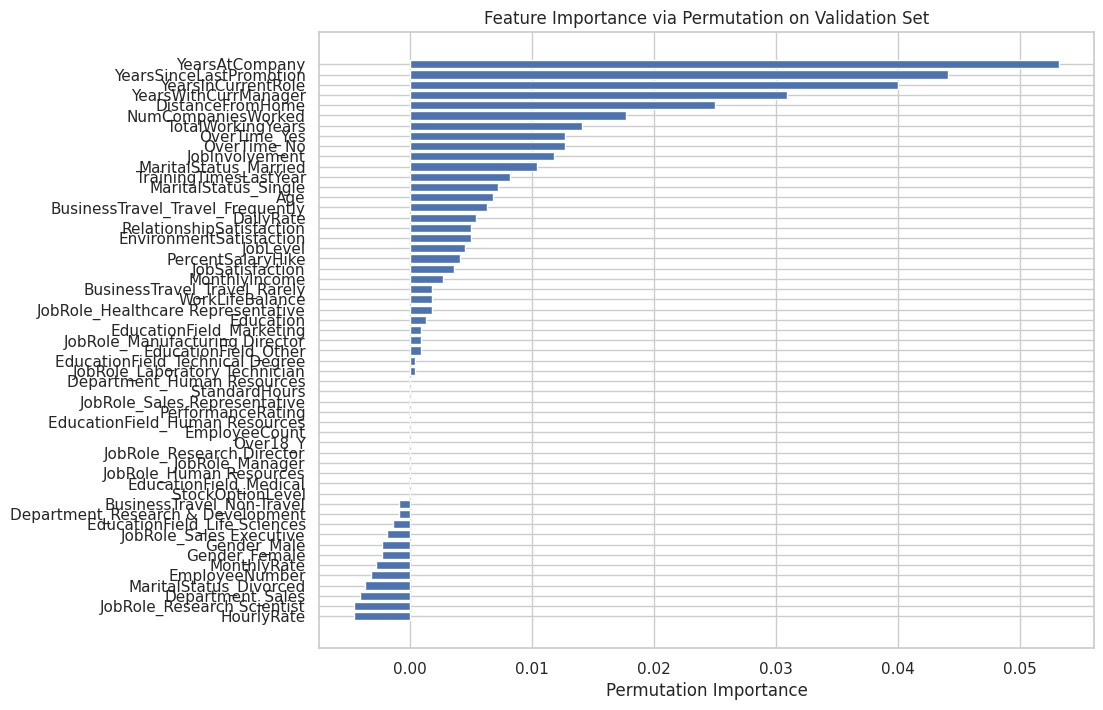

In [36]:
from sklearn.inspection import permutation_importance

# Usando el modelo de regresión logística con balance de clases
model_to_use = logistic_model if 'logistic_model_balanced' not in locals() else logistic_model_balanced

# Calculando la importancia de los factores mediante permutación
perm_importance = permutation_importance(model_to_use, X_val_dummies, y_val_encoded, n_repeats=10, random_state=42)

# Obtención de las importancias y sus índices ordenados
sorted_idx = perm_importance.importances_mean.argsort()

# Graficando las importancias de los factores
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X_val_dummies.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance via Permutation on Validation Set")
plt.show()


**Influencia en la Attrition (abandono del empleo)**:

**Años en la compañía (YearsAtCompany)**: Una característica destacada que parece tener un gran impacto en la decisión de un empleado de abandonar la empresa. Esto podría estar relacionado con factores como la satisfacción en el puesto actual o la progresión en la carrera.

**Años desde la última promoción (YearsSinceLastPromotion)**: Si un empleado no ha recibido una promoción en mucho tiempo, es posible que busque oportunidades de avance en otra parte.

**Satisfacción en la relación (RelationshipSatisfaction)**: Sugiere que cómo se siente un empleado con respecto a sus relaciones en el trabajo puede influir en su deseo de permanecer en la empresa.

In [37]:
from sklearn.inspection import permutation_importance

perm_importance_result = permutation_importance(logistic_model_balanced, X_val, y_val, n_repeats=10, random_state=42)
sorted_idx = perm_importance_result.importances_mean.argsort()
X_train.columns[sorted_idx]


Index(['HourlyRate', 'JobRole_Research Scientist', 'Department_Sales',
       'MaritalStatus_Divorced', 'EmployeeNumber', 'MonthlyRate',
       'Gender_Female', 'Gender_Male', 'JobRole_Sales Executive',
       'EducationField_Life Sciences', 'Department_Research & Development',
       'BusinessTravel_Non-Travel', 'StockOptionLevel',
       'EducationField_Medical', 'JobRole_Human Resources', 'JobRole_Manager',
       'JobRole_Research Director', 'Over18_Y', 'EmployeeCount',
       'EducationField_Human Resources', 'PerformanceRating',
       'JobRole_Sales Representative', 'StandardHours',
       'Department_Human Resources', 'JobRole_Laboratory Technician',
       'EducationField_Technical Degree', 'EducationField_Other',
       'JobRole_Manufacturing Director', 'EducationField_Marketing',
       'Education', 'JobRole_Healthcare Representative', 'WorkLifeBalance',
       'BusinessTravel_Travel_Rarely', 'MonthlyIncome', 'JobSatisfaction',
       'PercentSalaryHike', 'JobLevel', 'Enviro

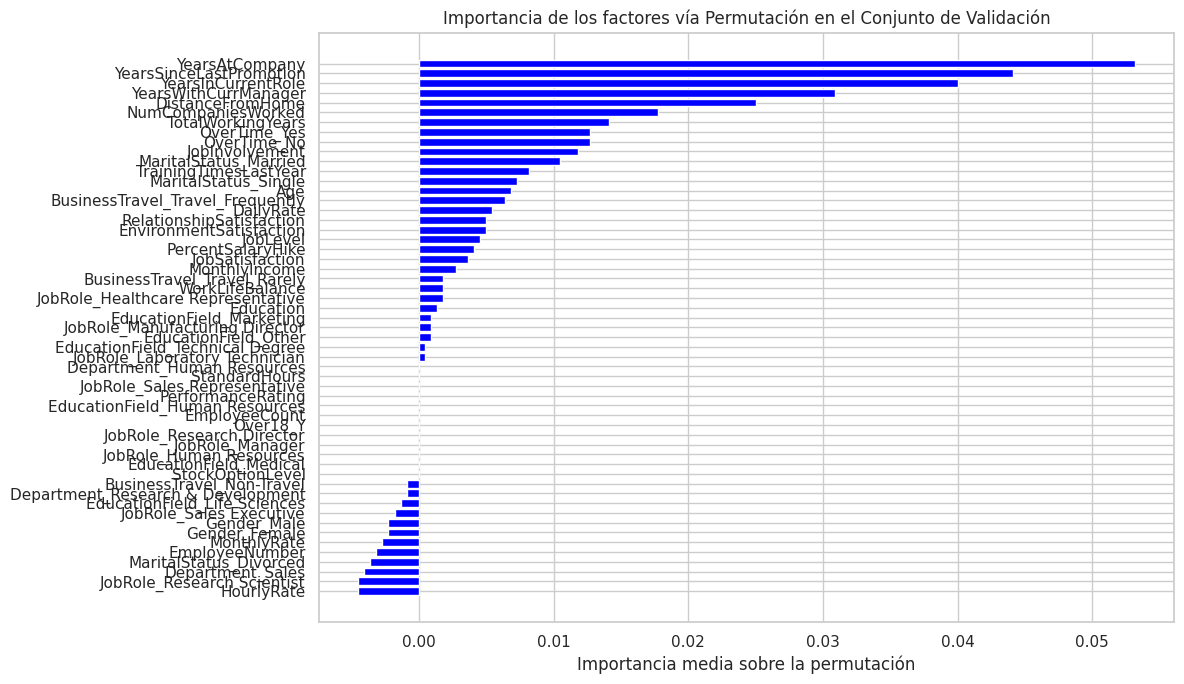

In [41]:
import matplotlib.pyplot as plt

# perm_importance_result
sorted_idx = perm_importance_result.importances_mean.argsort()

# Gráfico de barras de la importancia de las características
plt.figure(figsize=(12, 7))
plt.barh(range(len(sorted_idx)), perm_importance_result.importances_mean[sorted_idx], color='blue', align='center')
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel('Importancia media sobre la permutación')
plt.title('Importancia de los factores vía Permutación en el Conjunto de Validación')
plt.tight_layout()
plt.show()


# Factores que influyen en la attrition (abandono del empleo):

Los factores que se encuentran en la parte superior del gráfico, es decir, con mayor importancia, como **YearsAtCompany, YearsSinceLastPromotion, y YearsWithCurrManager**, sugieren que el tiempo que un empleado pasa en ciertas condiciones dentro de la empresa tiene un impacto significativo en la probabilidad de que decida dejar la empresa. Esto podría estar relacionado con la satisfacción laboral a largo plazo, las oportunidades de desarrollo y avance, y la relación con la gerencia.

# Factores que influyen en la no attrition (permanencia en el empleo:

En la parte inferior del gráfico, los factores con menor importancia, como **HourlyRate y Gender**, pueden tener un efecto menos directo en la decisión de un empleado de abandonar la empresa. Sin embargo, es importante considerar que incluso los factores con menor importancia pueden tener interacciones complejas con otros factores y no deben ser completamente ignorados.

# Comparación con métodos anteriores:

* La importancia de los factores derivada de los coeficientes de un modelo de regresión logística generalmente proporciona una medida lineal de la importancia, que puede no capturar relaciones no lineales o interacciones entre características.

* El método de permutación, por otro lado, puede capturar mejor la importancia no lineal y las interacciones al evaluar el impacto de la mezcla de los valores de una característica en el rendimiento del modelo.

# Reducción de factores y reentrenamiento

In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

#  logistic_model_balanced
selector = SelectFromModel(logistic_model_balanced, prefit=True)

# Transformando los conjuntos de entrenamiento y validación
X_train_reduced = selector.transform(X_train_dummies)
X_val_reduced = selector.transform(X_val_dummies)

# Creación y entrenamiento del modelo con características reducidas
logistic_model_reduced = LogisticRegression(max_iter=1000)
logistic_model_reduced.fit(X_train_reduced, y_train_encoded)

# Predicción en el conjunto de validación
y_val_pred_reduced = logistic_model_reduced.predict(X_val_reduced)

# Cálculo del número de características
original_feature_count = X_train_dummies.shape[1]
reduced_feature_count = X_train_reduced.shape[1]
reduction_percentage = (original_feature_count - reduced_feature_count) / original_feature_count * 100

# Resultados de la reducción de características
print(f'Original number of features: {original_feature_count}')
print(f'Reduced number of features: {reduced_feature_count}')
print(f'Percentage of reduction: {reduction_percentage:.2f}%')

# Matriz de confusión y reporte de clasificación
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred_reduced)
class_report = classification_report(y_val_encoded, y_val_pred_reduced)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Original number of features: 55
Reduced number of features: 21
Percentage of reduction: 61.82%
Confusion Matrix:
[[177   8]
 [ 17  18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       185
           1       0.69      0.51      0.59        35

    accuracy                           0.89       220
   macro avg       0.80      0.74      0.76       220
weighted avg       0.88      0.89      0.88       220



**Número original de características: 55**

**Número reducido de características: 21**

**Porcentaje de reducción: 61.82%**

La reducción de factores ha sido significativa, disminuyendo el conjunto original de características en un **61.82%**, lo que indica una selección más concentrada de características importantes para el modelo.

# PARTE 6: Modelo final y conclusiones

In [45]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Combinar los conjuntos de datos de entrenamiento y validación
X_combined = np.vstack((X_train_reduced, X_val_reduced))
y_combined = np.hstack((y_train, y_val))

# Entrenar el modelo final
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_combined, y_combined)

# Reducir el conjunto de prueba con el selector y hacer predicciones
X_test_reduced = selector.transform(X_test)
y_test_pred_final = final_model.predict(X_test_reduced)

# Exactitud (accuracy) en los conjuntos de entrenamiento y prueba
accuracy_train = final_model.score(X_combined, y_combined)
accuracy_test = accuracy_score(y_test, y_test_pred_final)

# Matriz de confusión y reporte de clasificación para el conjunto de prueba
confusion_matrix_test = confusion_matrix(y_test, y_test_pred_final)
classification_report_test = classification_report(y_test, y_test_pred_final)

print(f"Accuracy on training set: {accuracy_train:.2f}")
print(f"Accuracy on test set: {accuracy_test:.2f}")
print("Confusion Matrix on test set:\n", confusion_matrix_test)
print("Classification Report on test set:\n", classification_report_test)


Accuracy on training set: 0.88
Accuracy on test set: 0.87
Confusion Matrix on test set:
 [[180   5]
 [ 23  13]]
Classification Report on test set:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       185
           1       0.72      0.36      0.48        36

    accuracy                           0.87       221
   macro avg       0.80      0.67      0.70       221
weighted avg       0.86      0.87      0.86       221



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Los resultados indican que el modelo final es bastante preciso en la clasificación de los empleados que no presentan Attrition (clase 0). Sin embargo, para la clase Attrition (clase 1), aunque la **precisión** es relativamente **alta (0.72), el recall (0.36)** es bajo, lo que significa que el modelo no es tan efectivo en identificar todos los casos reales de attrition. El bajo **recall** indica que un número significativo de empleados que podrían dejar la empresa no son identificados correctamente por el modelo. El **f1-score** para la clase Attrition también refleja esta limitación con un valor de **0.48.**

Por lo tanto, aunque el modelo parece ser adecuado para identificar a los empleados que probablemente permanecerán en la empresa, podría necesitarse una mejora adicional para identificar mejor a aquellos en riesgo de dejar la empresa

